
# Project: No-Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset: No-show apponitments 

This dataset has 100K apponitment data with a variety of features. And the focus of this project is to use these features to predict whether the patient showed up or not. 
The dependent variable(target) is the "No_show" column which indicates if the appointment is "No show"
The 3 questions I ask are as below:
1. Does appointment long before the real visit tend to be "No show"?
2. Do age and gender affect the chance of no show?
3. Does client with conditions tend to not show up?
The independent varaibles I'll use include "ScheduledDay", "AppointmentDay", "Age", "Gender", "Hypertension", "Diabetes", "Handcap"

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
#There are 2 time data in string format, I convert the two columns into datetime stamp
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv'
                 ,parse_dates=['AppointmentDay','ScheduledDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# It seems there are no missing values with 110527 rows of data
# Data type of each columns are optimal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [5]:
# Double check the missing value: there are no missing value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# The minimum value in age column is -1, it doesn't make sense. I'll find the values < 0 and drop those rows
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Only one row with age < 0: row number 99832
df.loc[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
# The target of this dataset is the no show column
# The column has two values: yes and no, for easy calculation of no show rate, 
# I'd like to convert them to 0 and 1 where 0 stands for 'show up' and 1 for 'no show'
# To manipulate the data more easily, I'd also convert the column name'No-show' to 'No_show'
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

### Data Cleaning 

In [9]:
# Convert the column names 'Hipertension' to 'Hypertension' and 'No-show' to 'No_show'
df.rename(mapper = {'Hipertension':'Hypertension', 'No-show':'No_show'}, axis=1, inplace=True)

In [10]:
# Drop the row with age column < 0
df.drop(index=99832, axis=0, inplace=True)

In [11]:
# Comfirm the result: no negative value right now
df.Age.min()

0

In [12]:
# Check the shape of the data
df.shape

(110526, 14)

In [13]:
# Convert the 'No_show' column to 0 and 1(0 as show-up, 1 as no-show)
mapper = {'No': 0, 'Yes' : 1}
df['No_show']=df['No_show'].map(mapper)

In [14]:
# Confirm the transformation
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Does appointment long before the real visit tend to be "No show"?  

In [15]:
# cols = []
# for i in df.index:
#   cols.append((df.loc[i,'AppointmentDay'].date()-df.loc[i, 'ScheduledDay'].date()).days)
# len(cols)

# To answer this question, I'll create a nw feature: (ApponitmentDay - ScheduledDay) 
# to know how long it is betwen making an appointment and the real visit 

# Since the AppointmentDay column contains time information and ScheduledDay column has only date information, 
# when those two are at the same day, it'll show -1(actually, all data in this column loses one day). 
# So I add 1 day back to the result 

delta = (df['AppointmentDay']-df['ScheduledDay']).dt.days + 1

In [16]:
# delta for same day appoitment shows 0 now
delta[0]

0

In [17]:
df['Delta_d']= delta

In [18]:
# Now that the column 'Delta_d' data type is integer
type(df['Delta_d'][0])

numpy.int64

In [19]:
# Explore this columns: There are some negetive values which doesn't make sense
df['Delta_d']. max(), df['Delta_d'].min()

(179, -6)

In [20]:
# There are 5 rows with Delta_d < 0
# The apponittment day is earlier than scheduled day, it might be a mistake, so I'll drop these 5 rows
df.loc[df.Delta_d<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Delta_d
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,-1


In [21]:
# Drop those 5 rows
delta_drop_idx = df.index[df.Delta_d<0]
df.drop(index=delta_drop_idx, inplace=True)

In [22]:
# Re-check the data: there is no negative value in this column
(df.Delta_d < 0).sum()

0

In [23]:
# Check the shape again: the number of rows is correct
df.shape

(110521, 15)

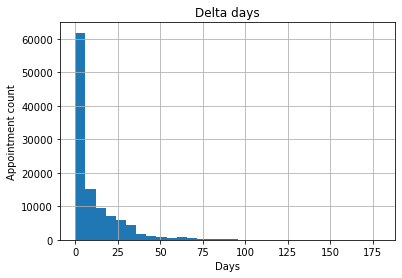

In [24]:
# Take a look at how this column is distributed
df.Delta_d.hist(bins=30)
plt.title('Delta days')
plt.xlabel('Days')
plt.ylabel('Appointment count')
plt.show();

>**The Delta_d column seems to have a very right skewed distribution, clearly not normaly distributed.
The majority of data points are within around 1 week, it's very hard to use mathematical method to transform it into a more    noramly distributed set of data. And it seems to have a lot of outliers** 

In [26]:
# To deal with this kind of distribution and the abundant outliers, 
# I'd like to discretize Delta_d column
# First I check the distribution by numbers and then decide how to bin it.
# Same day apponitment is way more than others
df.Delta_d.value_counts().sort_index()

0      38562
1       5213
2       6725
3       2737
4       5290
       ...  
155       10
162       11
169        8
176       16
179       10
Name: Delta_d, Length: 129, dtype: int64

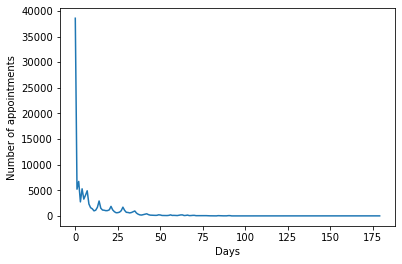

In [27]:
# It seems that most of the cases have apponitments within around 30 days
df.Delta_d.value_counts().sort_index().plot()
plt.xlabel('Days')
plt.ylabel('Number of appointments')
plt.show()

>**The lineplot is the same as histogram and shows most of the data points are within around 7 days, and 0 day clearly has the most data points. I'd like to find another boundary, it looks like the data point are very few after around 37 or 38 days.**

In [28]:
# Discretize the Delta_d columns into bins
# Besides same day and 1 week, I chose to cut at 30 days(1 month) as another boundary 
# in order to make sense to the audience and for simplicity,
delta_edge = [-1,1,8,31,180]
delta_label = ['same_day','within_1week','within_1month','more_than_1month']
df['delta_bins']=pd.cut(df.Delta_d, delta_edge, labels=delta_label)

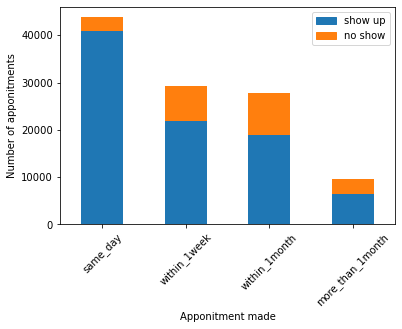

In [29]:
# Create a barplot and seperate show/no show in each group
# I used stacked bar for easier visualization of the percentage for no show in each group
import matplotlib.patches as mpatches
df.groupby(['delta_bins','No_show']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Apponitment made')
plt.ylabel('Number of apponitments')
blue_patch = mpatches.Patch(label='show up', color='C0')
o_patch = mpatches.Patch(label='no show', color='C1')
plt.legend(handles=[blue_patch, o_patch])
plt.xticks(rotation=45)
plt.show()

>**It looks like people with same day appointment tend to have way less chance of no show. Apponitment within 1 week has a no show rate slightly lower than the other two group**

In [30]:
# Count the actual rate: the conclusion is the same as visualization, same day apponitment has way less no show 
# One third of clients who made an apoonitment more than one month ago didn't show up.
df.groupby('delta_bins')['No_show'].mean()

delta_bins
same_day            0.066362
within_1week        0.250102
within_1month       0.319981
more_than_1month    0.330208
Name: No_show, dtype: float64

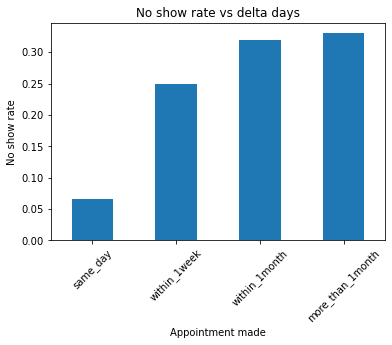

In [31]:
# Plot the result
# It is reasonable that clients made an apponitment more than one month before have higher rate of no show
df.groupby('delta_bins')['No_show'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('No show rate vs delta days')
plt.xlabel('Appointment made')
plt.ylabel('No show rate')
plt.show()

>**With the no show rate plot for each group, it is clear the same day appointment obviously has very low no show rate. 1/4 of patients booked the apponitment within 1 week didn't show up. around 1/3 of patients booked within 1 month and more than one month didn't show up on the apponitment date**

<AxesSubplot:>

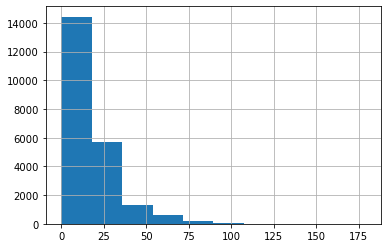

In [32]:
# The Delta_d in no show group is also not normaly distributed
df[df.No_show==1]['Delta_d'].hist()

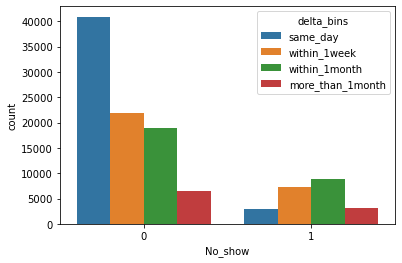

In [33]:
sns.countplot(x='No_show', data=df, hue='delta_bins');

>**I chose not to use this kind of analysis because the Delta_d column in 'no show' group is also very right skewed. Even if each delta_bins group in no show do not differ dramatically, this comparison is not reliable since number of data ponit in each delta_bins groups are very different**

### Research Question 2 : Do age and gender affect the chance of no show?

In [34]:
# Calculate the mean age of show up and no show: average age of clients who showed up is slightly higher, 
# but it's hard to say younger clients tend to not show up  
ave_show = df.Age.loc[df.No_show==0].mean()
ave_noshow = df.Age.loc[df.No_show==1].mean()
print('The average age of clients who show up is {}'.format(ave_show))
print("The average age of clients who didn't show up is {}".format(ave_noshow))

The average age of clients who show up is 37.790504154999034
The average age of clients who didn't show up is 34.31787218786412


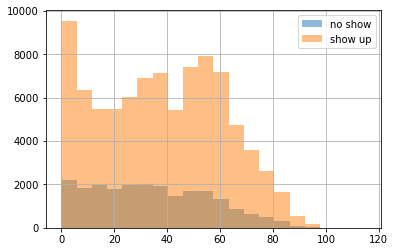

In [35]:
# Plot the show-up vs no-show in a histogram
df.Age.loc[df.No_show==1].hist(alpha=0.5, label='no show', bins=20)
df.Age.loc[df.No_show==0].hist(alpha=0.5, label='show up', bins=20)
plt.legend();

>**It is not easy to see the percentage of no show in each age group, the only thing I can say is that for those who are very young seems to have lower percentage of no show**

In [36]:
# Confirm the upper and lower limit for age column
df.Age.min(), df.Age.max()

(0, 115)

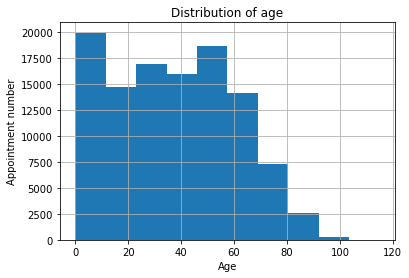

In [37]:
df.Age.hist()
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Appointment number');

>**The distribution is right skewed, it is possible that there are some outliers with clients older than 80**

In [38]:
# Detect the outliers: I set the upper boundary as 75% quantile plus 1.5 IQR
IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)
upper_bound= df.Age.quantile(0.75) + IQR * 1.5
upper_bound

110.5

In [39]:
# When the upper limit is set at 110.5, there are 5 outliers
df[df.Age>110.5]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Delta_d,delta_bins
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1,3,within_1week
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1,3,within_1week
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1,38,more_than_1month
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0,0,same_day
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,0,15,within_1month


>**As I looked into these 5 rows of data, 4 out of the 5 appointments are made by the same person 'Andorinhas'. Another question thus arises that perhaps certain clients always show up and they had many appointments or the opposite. If this happens, it can also affect the result of how age is related to no show. However, this is not my question in this project, I'll simply discretize the age column to reduce the effect of outliers**

In [40]:
# Discretize the age column to see if there's more information
edge_age = [-1, 18, 30, 50, 65, 120]
labels_age = ['child', 'teen', 'young adult', 'adult', 'elderly']
df['Age_bins'] = pd.cut(df.Age, edge_age, precision=0, labels=labels_age)

In [41]:
# Check the new column: 5 different items in this column
df.Age_bins.unique()

['adult', 'child', 'elderly', 'teen', 'young adult']
Categories (5, object): ['child' < 'teen' < 'young adult' < 'adult' < 'elderly']

In [42]:
# It seems elderly group has the lowest rate of no show and teen group has the highest
df.groupby('Age_bins')['No_show'].mean().sort_values(ascending=False)

Age_bins
teen           0.247032
child          0.219851
young adult    0.207017
adult          0.165491
elderly        0.155263
Name: No_show, dtype: float64

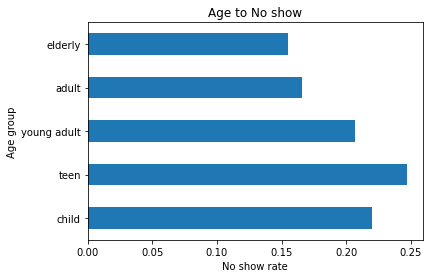

In [43]:
# Plot the result in a barplot
# It turns out the lowest rate of no show is among the oldest group instead of youngest group that I observed in previous histogram
df.groupby('Age_bins')['No_show'].mean().plot(kind='barh')
plt.title('Age to No show')
plt.ylabel('Age group')
plt.xlabel('No show rate')
plt.show()

>**Less than 1/5 of clients in elderly and adult groups didn't show up. On the contrary, around 1/4 of the appointment made by teenage clients are ''no show'.**

In [44]:
# I'm curious about how gender plays a role in this, so I add one more feature for analysis
age_sex = pd.crosstab(df.Age_bins, df.Gender, values=df.No_show, aggfunc='mean')

In [45]:
# Calculate and disply no show rate in each age group and gender
age_sex

Gender,F,M
Age_bins,,
child,0.221345,0.218245
teen,0.249215,0.240800
young adult,0.208093,0.204573
adult,0.167916,0.160301
elderly,0.156509,0.152721


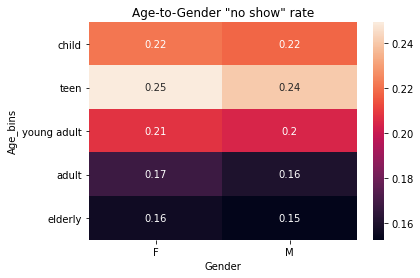

In [46]:
# Plot the result
plt.title('Age-to-Gender "no show" rate')
sns.heatmap(age_sex, annot=True);

>**The heatmap shows similar result that the elderly has the lowest no show rate and teen the highest.
What is interesting is that female group actually has a higher rate of no show which is the opposite of what I thought,
the difference is really small though.**

### Research Question 3 : Does client with condition tend to not show up?

In [48]:
# To answer this question, I first create a new feature "condition" and 
# designate client who has either hypertension, diabetes, or handicap as 1, others as 0
# First, create a function
def med_condition(row):
  if row['Hypertension']!=0:
    result=1
  elif row['Diabetes']!=0:
    result=1
  elif row['Handcap']!=0:
    result=1
  else:
    result=0
  return result

In [49]:
df['condition'] = df.apply(lambda row: med_condition(row),axis=1)

In [50]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Delta_d,delta_bins,Age_bins,condition
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,same_day,adult,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,same_day,adult,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,same_day,adult,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,same_day,child,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,same_day,adult,1


In [51]:
# Check if the items in the new column is correct
df.condition.unique()

array([1, 0], dtype=int64)

In [52]:
# Most of clients do not have DM, HTN, or disabilities
df.condition.value_counts()

0    86033
1    24488
Name: condition, dtype: int64

In [53]:
noshow_con = df.groupby('condition')['No_show'].mean()

In [54]:
# No show rate among clients without any of the three conditions is higher
noshow_con

condition
0    0.209408
1    0.175515
Name: No_show, dtype: float64

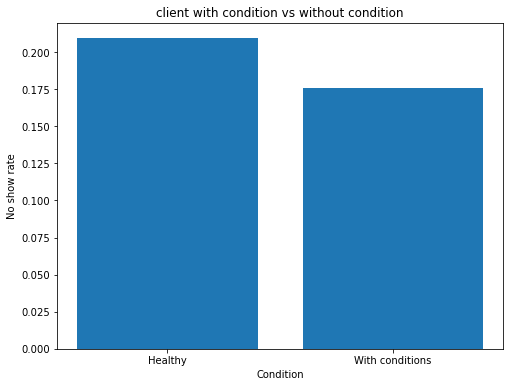

In [55]:
# Plot the result
# Relatively healthy clients have slightly higher no show rate
fig, ax = plt.subplots(figsize=(8,6))
ax.bar([0,1], noshow_con)
plt.title('client with condition vs without condition')
ax.set_xlabel('Condition')
ax.set_ylabel('No show rate')
ax.set_xticks([0,1])
ax.set_xticklabels(['Healthy', 'With conditions'])
plt.show()

>**About 1/5 of appointments made by clients without hypertension, diabetes, or handicap didn't show up. On the contrary, less than 1/5 of appointments made by clients with these condition did not show up**

<a id='conclusions'></a>
## Conclusions

> **Do patients making appointments long before the real visit tend to be "No show"?**: 
From the rate of no show calculated previously, I can say that it seems to be a trend client booked long ago is more likely to not show up. Client booked and visited on the same day almost always come to the clinic with a no show rate as low as 6%. However, the difference between within one week group, within one month group, and more than one month group is small, and I don't know if this difference is statistically significant.

> **Do age and gender affect the chance of no show?**: 
This one is trickier. The average age for no show group is somewhat lower, however, the number of no show group is way less than show up group rendering it to have small sample size. So it's hard to draw the conclusion that younger clients tend to not show up. When I calculated each binned age group respectively, it is clearer that the elderly and adult group have lower no show rate than teen and child group which is pretty reasonable.
Then when I took gender into account, the no show rate for female and male are very similar and shows the same trend that elderly has lower no show and teen higher. From the analysis, gender does not affect whether client visit or not, but age does. 

>**Does client with condition tend to not show up?**: 
My assumption is clients with these conditions may be more compliant because whatever reason they visited the clinic, it may be severer given that they already have premorbid conditions. The analysis result indicates the same with my speculation. But again, the difference between 20% and 17% is small and I can't be sure if this is statistically significant.

>**From the above analysis, if I had to choose one single feature that can strongly predict show/no show, I would say if the client booked on the same day as the actualy visit is the strongest predictor.** 

## Limitations
>The two numeric columns I used to analyze the data('Delta_d' and 'Age') are not normaly distributed and very right skewed.      It can potentially affect the generalization of the data.

>The no show rate difference between healthy/with condition group, and between each age groups are pretty small. Whether or      not they are statistically significant is unknown.

>The analysis is based on appointments. It is possible that the same client had a lot of appointments and these appointments    made by the same client might have the same tendency in terms of show-up or no-show. I didn't take this this part into          consideration. If there are many cases like this, it can dramatically affect my analysis result.